In [2]:
import numpy as np
import matplotlib.pyplot as plt

# I.

In [3]:
N = 100
theta = 3 # try 1, 2, 3, 4, 5

x = np.random.uniform(-theta, theta, N)

Для $X\sim R[-\theta, \theta]$ метод моментов дает:
    $$EX=\frac{1}{2}(a+b)= \frac{1}{2}(-\theta+\theta)=0 = \overline{X}$$
    $$EX^2 = \frac{1}{3}(a^2+ab+b^2) = \frac{1}{3}(\theta^2-\theta^2+\theta^2)=\frac{\theta^3}{3} = \overline{X^2}$$
    $$\Rightarrow \theta = \sqrt{3 \overline{X^2}}$$

In [4]:
theta_mm = np.sqrt(3*(x**2).mean())
theta_mm

3.2691678761010716

Для $X\sim R[-\theta, \theta]$ метод максимума правдоподобия дает:
    $$f_X(x) = \frac{1}{2\theta}I_{x\in [-\theta, \theta]}$$
    $$\Rightarrow L = \left(\frac{1}{2\theta}\right)^n \Rightarrow \log L = \ell = - n \log{2\theta}$$
    $$\Rightarrow \frac{\partial \ell}{\partial \theta} = - \frac{n}{\theta} < 0$$
    Производная равна отрицательному числу при всех $\theta>0$. Тогда максимальное значение отрицательной дроби достигается при максимуме знаменателя, то есть $X_{(n)} = \max(X_1,X_2,\ldots, X_n)$

In [5]:
theta_mle = x.max()
theta_mle

2.9650997273329427

Увеличим N:

In [6]:
N = 1000
theta = 3 # try 1, 2, 3, 4, 5

x = np.random.uniform(-theta, theta, N)

theta_mm = np.sqrt(3*(x**2).mean())
theta_mle = x.max()

theta_mm, theta_mle

(2.981553149150535, 2.991493883213942)

```Какая лучше?``` На самом деле неясно. При малых $N$ везде получается чепуха, но MLE оценка, например, никогда не будет больше оцениваемого параметра, тогда как MM может. При больших $N$ обе оценки сходятся к параметру.

Проверим ассимптотическую нормальность:

In [7]:
M = 10000
N = 100

est_mm = []
est_mle = []

for i in range(M):
    x = np.random.uniform(-theta, theta, N)

    theta_mm = np.sqrt(3*(x**2).mean())
    theta_mle = x.max()
    
    est_mm.append(theta_mm)
    est_mle.append(theta_mle)

est_mm = np.array(est_mm)
est_mle = np.array(est_mle)

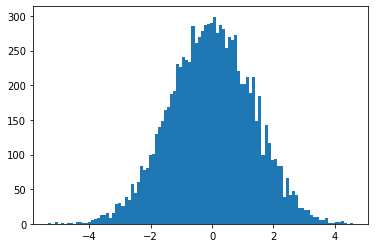

In [8]:
plt.hist(np.sqrt(N)*(est_mm - theta), bins = 100)
plt.show()

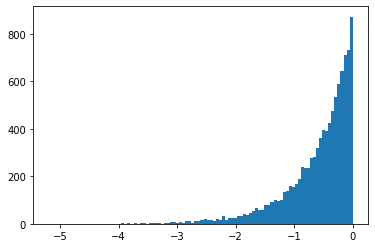

In [9]:
plt.hist(np.sqrt(N)*(est_mle - theta), bins = 100)
plt.show()

```Вывод:``` Метод моментов - ассимптотически нормальная оцнка, а метод максимума правдоподобия - нет (хотя вроде как должна быть).

# II.

$f_\theta(x) = e^{\theta - x}I_{x>\theta} \Rightarrow F_\theta(x) = 1-e^{\theta-x}I_{x>\theta} \Rightarrow F^{-1}_\theta(u) = \theta - \ln{(1-u)}$

In [10]:
N = 100
theta = 1.8

u = np.random.uniform(0,1,N)
x = theta - np.log(1-u)

Для $X\sim f_\theta(x) = e^{\theta - x}I_{x>\theta} $ метод моментов дает:
$$EX = \int_\theta^\infty x\cdot e^{\theta-x}dx = \theta + 1 = \overline{X}$$
$$\Rightarrow \theta = \overline{X}-1$$

In [11]:
theta_mm = x.mean() - 1
theta_mm

1.9353915829681005

Для $X\sim f_\theta(x) = e^{\theta - x}I_{x>\theta} $ метод максимума правдоподобия дает:
$$ L = e^{n\theta - \sum x_i} I_{x_1>\theta}\ldots I_{x_n>\theta} = e^{n\cdot\left(\theta - \overline{x}\right)}I_{x_{(1)}>\theta} \Rightarrow$$
$$ \ell = \ln L =  n\cdot\left(\theta - \overline{x}\right) I_{x_{(1)}>\theta}$$
Видно, что $\ell$ растет с увеличением $\theta$, а значит максимум находится в бесконечности. Вроде, из-за этого ОМП для такой плотности просто нету.

Проверим ассимптотическую нормальность у метода моментов:

In [12]:
M = 10000
N = 100

est_mm = []

for i in range(M):
    u = np.random.uniform(0,1,N)
    x = theta - np.log(1-u)

    theta_mm = x.mean() - 1
    
    est_mm.append(theta_mm)

est_mm = np.array(est_mm)

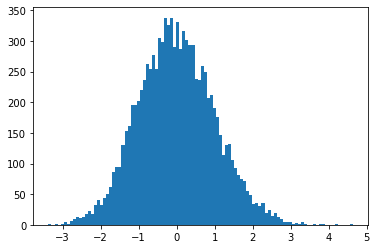

In [13]:
plt.hist(np.sqrt(N)*(est_mm - theta), bins = 100)
plt.show()

Вывод: Визуально нормальность имеется